In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\abdullah\\OneDrive - Asia Pacific University\\Year 3\\FYP\\Dataset\\olist_order_items_dataset.csv")


In [3]:
# Convert shipping_limit_date to datetime
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [4]:
df['shipping_limit_date']

0        2017-09-19 09:45:35
1        2017-05-03 11:05:13
2        2018-01-18 14:48:30
3        2018-08-15 10:10:18
4        2017-02-13 13:57:51
                 ...        
112645   2018-05-02 04:11:01
112646   2018-07-20 04:31:48
112647   2017-10-30 17:14:25
112648   2017-08-21 00:04:32
112649   2018-06-12 17:10:13
Name: shipping_limit_date, Length: 112650, dtype: datetime64[ns]

In [5]:
# ---------------------------
# Feature Engineering
# ---------------------------

# 1. Extract date-time features from shipping_limit_date
df['shipping_year'] = df['shipping_limit_date'].dt.year
df['shipping_month'] = df['shipping_limit_date'].dt.month
df['shipping_day'] = df['shipping_limit_date'].dt.day
df['shipping_weekday'] = df['shipping_limit_date'].dt.weekday  # Monday=0, Sunday=6
df['shipping_hour'] = df['shipping_limit_date'].dt.hour


In [6]:
# 2. Order-level feature: number of items per order
# Calculate the maximum order_item_id for each order_id to get total items in that order
order_items_count = df.groupby('order_id')['order_item_id'].max().reset_index().rename(
    columns={'order_item_id': 'total_items_in_order'}
)

In [7]:
# Merge this back into the main dataframe
df = df.merge(order_items_count, on='order_id', how='left')

In [8]:
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_year,shipping_month,shipping_day,shipping_weekday,shipping_hour,total_items_in_order
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9,19,1,9,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5,3,2,11,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1,18,3,14,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8,15,2,10,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2,13,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018,5,2,2,4,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018,7,20,4,4,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017,10,30,0,17,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017,8,21,0,0,1


In [9]:
# 3. Price-to-freight ratio: this feature might help in both prediction and anomaly detection
df['price_to_freight_ratio'] = df['price'] / (df['freight_value'] + 1e-8)  # Add a small constant to avoid division by zero


In [10]:
# 4. Encode categorical features (seller_id and product_id)
# For simplicity, we convert them to categorical codes. Note: High cardinality might need special treatment later.
df['seller_id_encoded'] = df['seller_id'].astype('category').cat.codes
df['product_id_encoded'] = df['product_id'].astype('category').cat.codes

In [11]:
# Display the updated DataFrame with new features
print(df.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  shipping_year  shipping_month  \
0 2017-09-19 09:45:35   58.90          13.29           2017               9   
1 2017-05-03 11:05:13  239.90          19.93           2017               5   

In [12]:
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_year,shipping_month,shipping_day,shipping_weekday,shipping_hour,total_items_in_order,price_to_freight_ratio,seller_id_encoded,product_id_encoded
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017,9,19,1,9,1,4.431904,854,8628
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017,5,3,2,11,1,12.037130,2678,29597
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018,1,18,3,14,1,11.135982,1117,25667
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018,8,15,2,10,1,1.015637,1919,15322
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017,2,13,0,13,1,11.019846,2697,22079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018,5,2,2,4,1,6.910620,2218,9721
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018,7,20,4,4,1,9.581166,2948,6618
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017,10,30,0,17,1,5.893805,2365,14847
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017,8,21,0,0,1,6.420872,510,20085


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
features = [
    'price', 'total_items_in_order', 'price_to_freight_ratio',
    'shipping_month', 'shipping_day', 'shipping_weekday', 'shipping_hour',
    'seller_id_encoded', 'product_id_encoded'
]

X = df[features]
y = df['freight_value']  # Target variable for cost estimation

# Splitting into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shape of training & test sets
print(f"Train set shape: {X_train_scaled.shape}, Test set shape: {X_test_scaled.shape}")


Train set shape: (90120, 9), Test set shape: (22530, 9)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Initialize model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)

# Predictions
y_pred = regressor.predict(X_test_scaled)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 2.3738241494076524
Root Mean Squared Error: 4.802464330836271


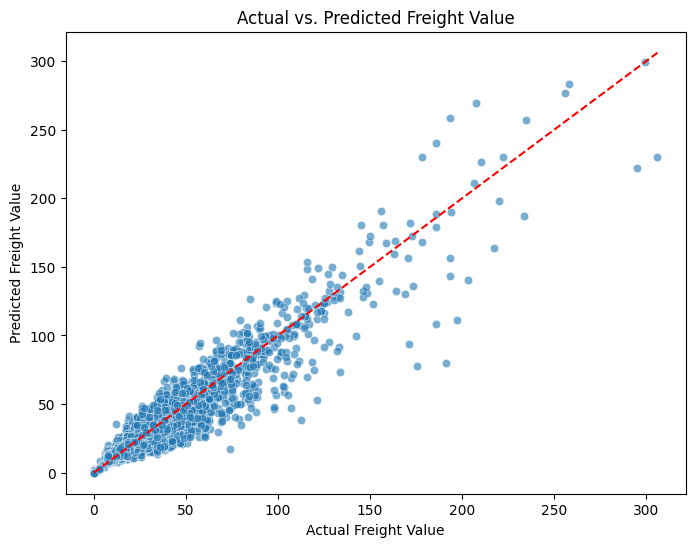

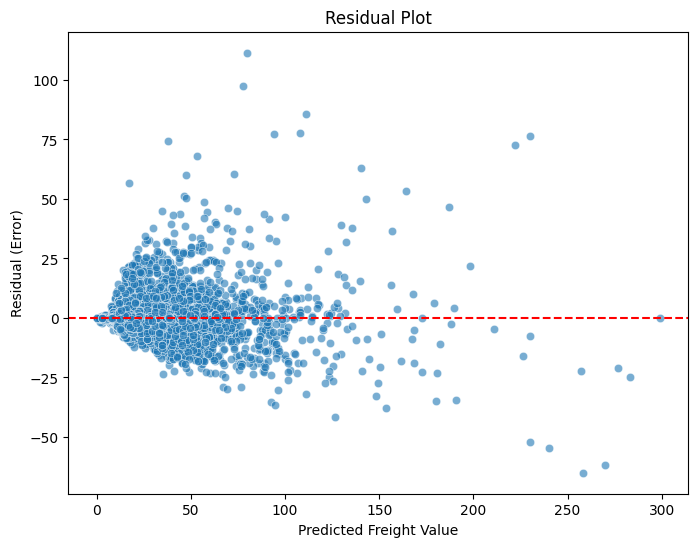

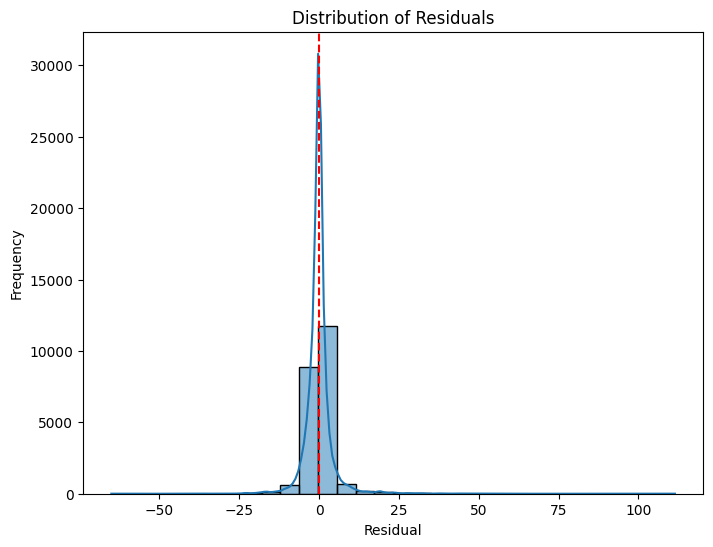

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Freight Value")
plt.ylabel("Predicted Freight Value")
plt.title("Actual vs. Predicted Freight Value")
plt.show()

# Residual Plot: Errors between actual and predicted values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Freight Value")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot")
plt.show()

# Histogram of Residuals: Checking distribution of errors
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [17]:
import matplotlib.pyplot as plt

# Separate normal and anomaly data
normal_data = df[df['anomaly_score'] == 0]
anomalies = df[df['anomaly_score'] == 1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(normal_data['price'], normal_data['price_to_freight_ratio'],
            color='blue', alpha=0.5, label='Normal')
plt.scatter(anomalies['price'], anomalies['price_to_freight_ratio'],
            color='red', alpha=0.7, label='Anomaly')

# Log scale for better visualization
plt.yscale('log')

# Labels and title
plt.xlabel('Price')
plt.ylabel('Price-to-Freight Ratio (Log Scale)')
plt.title('Anomaly Detection: Price vs. Price-to-Freight Ratio')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.show()



Number of anomalies detected: 5585
                             order_id  price  freight_value  \
16   0009c9a17f916a706d71784483a5d643  639.0          11.34   
39   0017afd5076e074a48f1f1a4c7bac9c5  809.1          44.29   
114  00404fa7a687c8c44ca69d42695aae73   99.9           0.00   
115  0040a56893444cb56cba7cfe2225e34e   84.9          34.39   
164  0068468c453d28c8ef3fd089e50a5847  469.0          20.85   

     price_to_freight_ratio  
16             5.634921e+01  
39             1.826823e+01  
114            9.990000e+09  
115            2.468741e+00  
164            2.249400e+01  


In [19]:
print(df.columns)  # Check available columns


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'shipping_year',
       'shipping_month', 'shipping_day', 'shipping_weekday', 'shipping_hour',
       'total_items_in_order', 'price_to_freight_ratio', 'seller_id_encoded',
       'product_id_encoded', 'anomaly_score'],
      dtype='object')


C:\Users\abdullah\AppData\Local\Temp\ipykernel_23092\1468689178.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly_score'] = iso_forest.predict(X_scaled)
C:\Users\abdullah\AppData\Local\Temp\ipykernel_23092\1468689178.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'] = (df['anomaly_score'] == -1).astype(int)


Number of anomalies detected: 1123
                              order_id    price  freight_value  \
322   00c9474e0334f7a4ffc8c3a8bd21a51e  1050.61          25.13   
518   012f2c4ca09b101a73e18957c3294cd6  1820.00          81.62   
865   02014f2495eef0e869616829d481d743  1240.00         102.63   
873   02058d1c3b825765a4ec45968b8a1c97  1799.00          27.34   
1019  025d78a44b8f48c66fd09239910302b1   827.99          14.15   

      price_to_freight_ratio  
322                41.807004  
518                22.298456  
865                12.082237  
873                65.801024  
1019               58.515194  


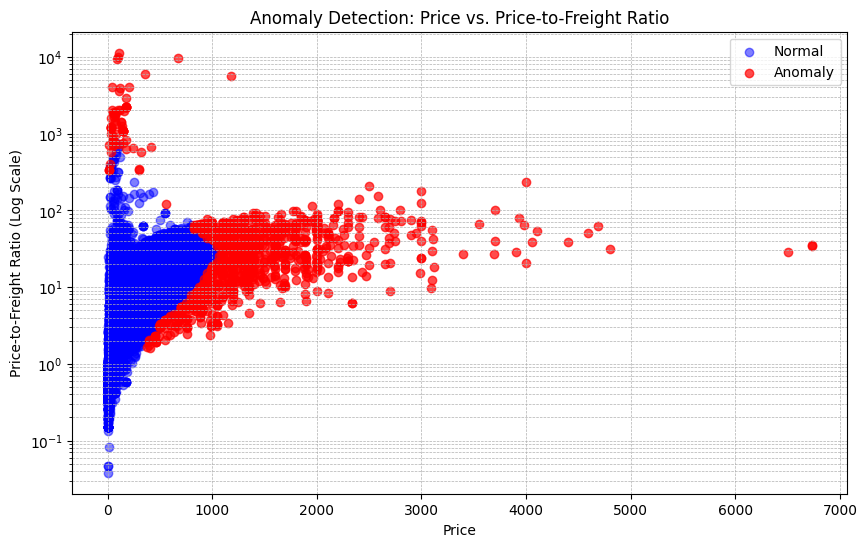

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
# Load or generate your dataset (assuming df is already loaded)
features = ['price', 'freight_value', 'price_to_freight_ratio']  # Define relevant features

# Standardize the feature set
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df[['price', 'freight_value', 'price_to_freight_ratio']])

# Fit the model with a lower contamination rate
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Reduce contamination
iso_forest.fit(X_scaled)

# Predict anomalies
df['anomaly_score'] = iso_forest.predict(X_scaled)
df['anomaly'] = (df['anomaly_score'] == -1).astype(int)

# Filter extreme ratio values
df = df[df['price_to_freight_ratio'] < 1e6]

# Display detected anomalies
anomalies = df[df['anomaly'] == 1]
print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies[['order_id', 'price', 'freight_value', 'price_to_freight_ratio']].head())

# --- Visualization ---
plt.figure(figsize=(10, 6))

# Separate normal and anomaly data
normal_data = df[df['anomaly'] == 0]
anomaly_data = df[df['anomaly'] == 1]

# Scatter plot
plt.scatter(normal_data['price'], normal_data['price_to_freight_ratio'],
            color='blue', alpha=0.5, label='Normal')
plt.scatter(anomaly_data['price'], anomaly_data['price_to_freight_ratio'],
            color='red', alpha=0.7, label='Anomaly')

# Use log scale for better visibility of extreme values
plt.yscale('log')

# Labels and title
plt.xlabel('Price')
plt.ylabel('Price-to-Freight Ratio (Log Scale)')
plt.title('Anomaly Detection: Price vs. Price-to-Freight Ratio')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.show()
